# Evaluador
***

In [8]:
%matplotlib inline

In [9]:
from darkflow.net.build import TFNet
import cv2

In [10]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

## Cargamos YOLO

In [11]:
options = {"model": "cfg/yolo.cfg", "load": "weights/yolo.weights", "threshold": 0.4}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading weights/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.025791406631469727s
Model has a coco model name, loading coco labels.


## Cargamos algunas imágenes

In [12]:
results = []
images = []
images_path = ["./test/000001.jpg",
               "./test/varios.jpg",
               "./test/dog.jpg",
               "./test/dogs.jpg", 
               "./test/selfie2.jpg",
               "./test/niebla.jpg",
               "./test/birds.jpg",
               "./test/cars.jpg",
               "./test/cebras.jpg",
               "./test/indoor.jpg"]

for image_path in images_path:
    images.append(io.imread(image_path))
    results.append(tfnet.return_predict(images[len(images)-1]))

## Las mostramos

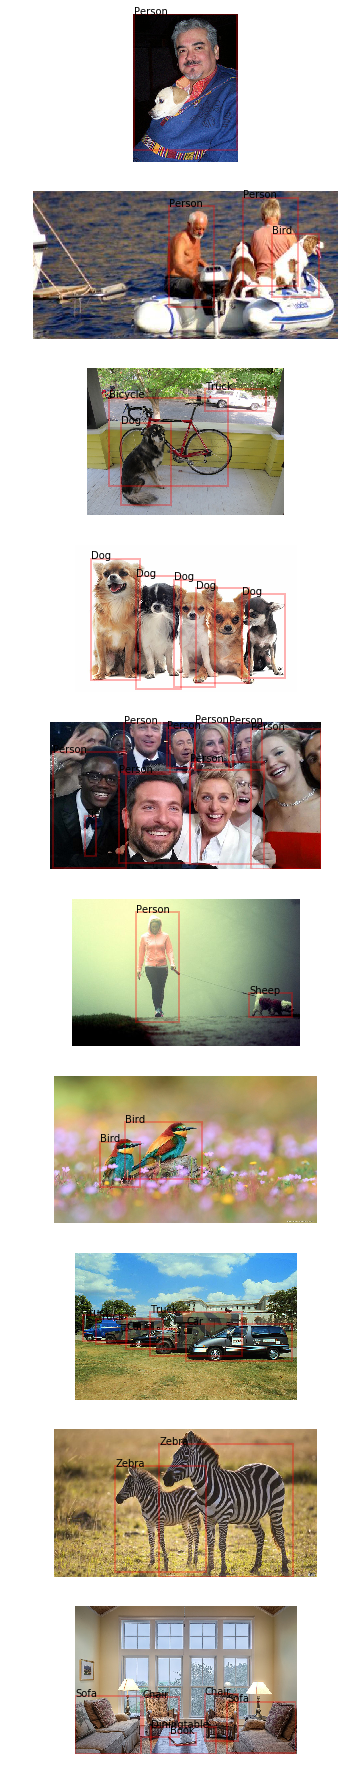

In [13]:
# Mostramos las imagenes resultantes
fig, axes = plt.subplots(nrows=len(images_path), figsize=(32, 32))

for result, ax, img in zip(results, axes, images):    
    ax.imshow(img)
    ax.axis('off')
    for label in result:
        topleft = label['topleft']
        bottomright = label['bottomright']

        height = bottomright['y'] - topleft['y']
        width = bottomright['x'] - topleft['x']

        coord = [topleft['x'], topleft['y'], width, height]

        ax.add_patch(plt.Rectangle((topleft['x'], topleft['y']), width, height, edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
        ax.annotate(label['label'].capitalize(), xy=(topleft['x'], topleft['y']), xytext=(topleft['x'], topleft['y']))

## Ejemplo del resultado de una predicción

In [14]:
print(results[0])

[{'label': 'person', 'confidence': 0.82474488, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 352, 'y': 460}}]
